# ***Mujeeb Ur Rehman***

## The Spark Foundation - Data Science and Business Analytics Internship

## Task 4 - Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

## As a security/defense analyst, try to find out the hot zone of terrorism.

## Importing the libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [10]:
data = pd.read_csv("Global.csv",engine = "python")

## Display first 5 rows

In [11]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Looking at the columns of Data

In [12]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Droping the irrelevant columns

In [14]:
data = data[["iyear","imonth","iday","extended","country_txt","provstate","region_txt","attacktype1_txt","target1","nkill",
             "nwound","summary","gname","targtype1_txt","weaptype1_txt","motive","city","latitude","longitude"]]
data.head()

,iyear,imonth,iday,extended,country_txt,provstate,region_txt,attacktype1_txt,target1,nkill,nwound,summary,gname,targtype1_txt,weaptype1_txt,motive,city,latitude,longitude
0,1970,7,2,0,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,Santo Domingo,18.456792,-69.951164
1,1970,0,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,Mexico city,19.371887,-99.086624
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN,Unknown,15.478598,120.599741
3,1970,1,0,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN,Athens,37.997490,23.762728
4,1970,1,0,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,Fukouka,33.580412,130.396361


## Info of data

In [20]:
data.shape

(181691, 19)

In [21]:
data.isnull().sum()

iyear                   0
imonth                  0
iday                    0
extended                0
country_txt             0
provstate             421
region_txt              0
attacktype1_txt         0
target1               636
nkill               10313
nwound              16311
summary             66129
gname                   0
targtype1_txt           0
weaptype1_txt           0
motive             131130
city                  434
latitude             4556
longitude            4557
dtype: int64

In [17]:
data['targtype1_txt'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [18]:
data['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

## Countries with most Terriost Attacks and its visualization

In [29]:
print("Country with most Terriost Attacks is " + data["country_txt"].value_counts().idxmax() + 
      " with "+ str(data["country_txt"].value_counts()[0]))

Country with most Terriost Attacks is Iraq with 24636


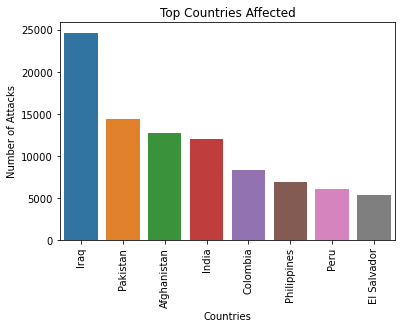

In [36]:
sns.barplot(data['country_txt'].value_counts()[:8].index,data['country_txt'].value_counts()[:8].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

### In countries most Terriost Attacks happend in IRAQ

## States with most Terriost Attacks and its visualization

In [39]:
print("Country with most Terriost Attacks is " + data["provstate"].value_counts().idxmax() + 
      " with "+ str(data["provstate"].value_counts()[0]))

Country with most Terriost Attacks is Baghdad with 7645


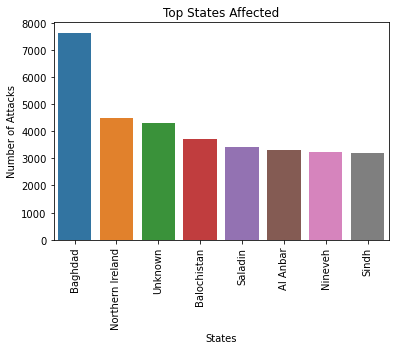

In [40]:
sns.barplot(data['provstate'].value_counts()[:8].index,data['provstate'].value_counts()[:8].values)
plt.title('Top States Affected')
plt.xlabel('States')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

## In states most Terriost Attack Happend in Baghdad

## Regions with most Terriost Attacks and its visualization

In [41]:
print("Country with most Terriost Attacks is " + data["region_txt"].value_counts().idxmax() + 
      " with "+ str(data["region_txt"].value_counts()[0]))

Country with most Terriost Attacks is Middle East & North Africa with 50474


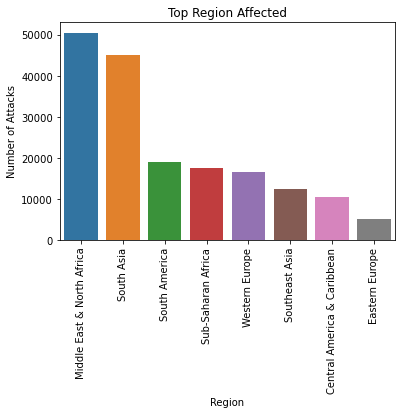

In [42]:
sns.barplot(data['region_txt'].value_counts()[:8].index,data['region_txt'].value_counts()[:8].values)
plt.title('Top Region Affected')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

### In Regions the most terrriost attacks happend in Middle East and North America

## Cities with most Terriost Attacks and its visualization

In [46]:
print("Country with most Terriost Attacks is " + data["city"].value_counts().idxmax() + 
      " with "+ str(data["city"].value_counts()[:2]))

Country with most Terriost Attacks is Unknown with Unknown    9775
Baghdad    7589
Name: city, dtype: int64


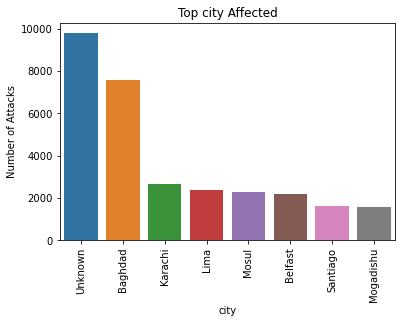

In [47]:
sns.barplot(data['city'].value_counts()[:8].index,data['city'].value_counts()[:8].values)
plt.title('Top city Affected')
plt.xlabel('city')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

## Most affected city is Baghdad because first one is unknown

# Conclusion
## Most Affected Country is IRAQ
## Most Affected State is Baghdad
## Most Affected Region is Middle East And North America
## Most Affected City is Baghdad